In [2]:
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plot
import matplotlib.cm as cm
from scipy import optimize
from scipy.io import loadmat

In [23]:
def display_data(X):
    """
    Transforms each input row into a rectangular image part and plots
    the resulting image.
    """
    m, n = X.shape
    example_width = int(np.around(np.sqrt(n)))
    example_height = int(n / example_width)
    display_rows = int(np.sqrt(m))
    display_cols = int(m / display_rows)
    display_array = np.ones((
        display_rows * example_height, display_cols * example_width
    ))
    for i in range(display_rows):
        for j in range(display_cols):
            idx = i * display_cols + j
            image_part = X[idx, :].reshape((example_height, example_width))
            display_array[
                (j * example_height):((j + 1) * example_height),
                (i * example_width):((i + 1) * example_width)
            ] = image_part
    plot.imshow(display_array.T, cm.Greys)
    plot.show()

In [5]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [24]:
def cost_function(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X.dot(theta))
    cost = sum(-y * np.log(h) - (1.0 - y) * np.log(1.0 - h))
    grad = X.T.dot(h - y)
    return (cost / m, grad / m)

In [25]:
def cost_function_reg(theta,X,y,lambda_):
    """
    로지스틱 회귀분석 정규화
    """
    m = X.shape[0]
    cost, gradient = cost_function(theta, X, y)
    reg_cost = (lambda_ / (2.0 * m)) * np.sum(theta[1:] ** 2)
    reg_gradient = (lambda_ / m) * theta
    reg_gradient[0] = 0
    return cost + reg_cost, gradient + reg_gradient


In [29]:
def one_vs_all(X,y,num_labels,lambda_):
    n = X.shape[1]
    all_theta = np.zeros((num_labels, n))
    for c in range(1, num_labels + 1):
        initial_theta = np.zeros(n)
        target = np.vectorize(int)(y == c)
        result = optimize.minimize(
            cost_function_reg,
            initial_theta,
            args=(X, target, lambda_),
            method='CG',
            jac=True,
            options={
                'maxiter': 50,
                'disp': True,
            }
        )
        theta = result.x
        cost = result.fun
        print('Training theta for label %d | cost: %f' % (c, cost))
        all_theta[c - 1, :] = theta
    return all_theta

In [21]:
def predict_one_vs_all(theta, X):
    return 1 + np.argmax(sigmoid(X.dot(theta.T)), axis=1)

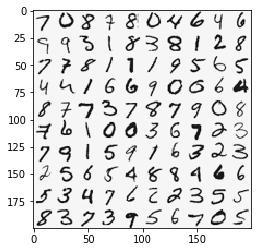

         Current function value: 0.026967
         Iterations: 50
         Function evaluations: 170
         Gradient evaluations: 170
Training theta for label 1 | cost: 0.026967
         Current function value: 0.068606
         Iterations: 50
         Function evaluations: 143
         Gradient evaluations: 143
Training theta for label 2 | cost: 0.068606
         Current function value: 0.071818
         Iterations: 50
         Function evaluations: 143
         Gradient evaluations: 143
Training theta for label 3 | cost: 0.071818
         Current function value: 0.052092
         Iterations: 50
         Function evaluations: 153
         Gradient evaluations: 153
Training theta for label 4 | cost: 0.052092
         Current function value: 0.077187
         Iterations: 50
         Function evaluations: 130
         Gradient evaluations: 130
Training theta for label 5 | cost: 0.077187
         Current function value: 0.034830
         Iterations: 50
         Function evaluations: 159

In [30]:
if __name__ == '__main__':
    data = loadmat('../OWNER\Documents/MachineLearning/machine-learning-ex3/machine-learning-ex3/ex3/ex3data1.mat')
    X = data['X']
    y = data['y'].flatten()
    sel = np.random.permutation(X)[:100]
    display_data(sel)
    m = X.shape[0]
    X = np.concatenate((np.ones((m,1)),X), axis=1)
    all_theta = one_vs_all(X, y, 10, 1)
    predictions = predict_one_vs_all(all_theta, X)
    accuracy = 100 * np.mean(predictions == y)
    print('Train accuracy: %0.2f %%' % accuracy)